<a href="https://colab.research.google.com/github/realmeelo/AI_Assignment/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Install Libraries

!pip install pandas


In [55]:
# @title Import Libraries
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, KFold


In [27]:
# @title Load the data
df = pd.read_excel('/content/Raisin_Dataset.xlsx')


In [29]:
# @title Preview Data
df.head(10)

#df.tail(10)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
5,49242,318.125407,200.122120,0.777351,51368,0.658456,881.836,Kecimen
6,42492,310.146072,176.131449,0.823099,43904,0.665894,823.796,Kecimen
7,60952,332.455472,235.429835,0.706058,62329,0.743598,933.366,Kecimen
8,42256,323.189607,172.575926,0.845499,44743,0.698031,849.728,Kecimen
9,64380,366.964842,227.771615,0.784056,66125,0.664376,981.544,Kecimen


In [30]:
# @title Check Data Statistics
df.describe()


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [31]:
# @title Extract Classes
raisin_classes = df['Class'].unique()

classes = {unique_class:id for id, unique_class in enumerate(raisin_classes)}
print(classes)




{'Kecimen': 0, 'Besni': 1}


In [35]:
# @title Transform
df['Class'] = df['Class'].map(classes)
df.head(10)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
5,49242,318.125407,200.122120,0.777351,51368,0.658456,881.836,0
6,42492,310.146072,176.131449,0.823099,43904,0.665894,823.796,0
7,60952,332.455472,235.429835,0.706058,62329,0.743598,933.366,0
8,42256,323.189607,172.575926,0.845499,44743,0.698031,849.728,0
9,64380,366.964842,227.771615,0.784056,66125,0.664376,981.544,0


In [36]:
# @title Split Data

train_dataset, test_dataset = train_test_split(df, test_size = 0.2)
X_train = train_dataset.drop('Class', axis = 1)
Y_train = train_dataset['Class']
X_test = test_dataset.drop('Class', axis = 1)
Y_test = test_dataset['Class']


In [48]:
# @title Normalize Data

Scaler = StandardScaler()

X_train = Scaler.fit_transform(X_train)

X_test = Scaler.transform(X_test)


In [49]:
# @title Train Model:
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [50]:
# @title Test Model:

Y_Pred = model.predict(X_test)


In [56]:
# @title Evaluate Model:

accuracy = accuracy_score(Y_test, Y_Pred)

print('Accuracy:', accuracy)


Accuracy: 0.8666666666666667


In [57]:
# @title Confusion Matrix:

cm = confusion_matrix(Y_test, Y_Pred)

print('confusion matrix')

print(cm)


confusion matrix
[[71  7]
 [17 85]]


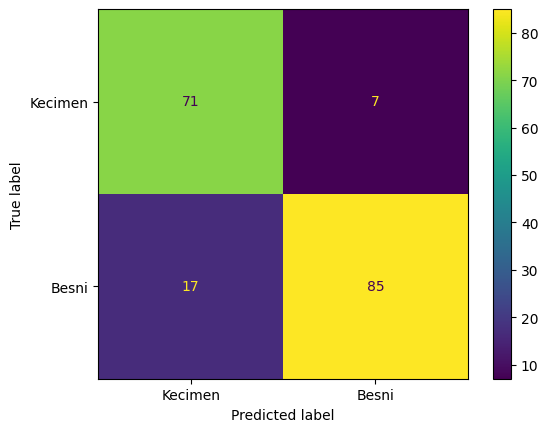

In [58]:
# @title Confusion Matrix Display

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =
                                    classes)
cm_display.plot()


In [59]:
# @title Cross Validation

cv = KFold(n_splits=5, shuffle = True, random_state=42)

scores = cross_val_score(model, X_train, Y_train, cv=cv, scoring = 'accuracy')

print('cross_validation Scores:', scores)


cross_validation Scores: [0.83333333 0.90277778 0.875      0.85416667 0.86111111]
